In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression

In [3]:
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [4]:
def plot_variance (pca, width=8, dpi=100):
    fig, axs = plt.subplots(1,2)
    n = pca.n_components_
    grid = np.arange(1, n+1)
    #Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    #Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0,grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    #set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

In [5]:
def make_mi_scores(X, y, discrete_feautures):
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
df = pd.read_csv(r"C:\Users\suyog\DataProcessing\data_set\autos.csv")

In [6]:
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [7]:
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]
X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

In [8]:
#Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [9]:
from sklearn.decomposition import PCA

#Create principle components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#Convert to dataframe
component_names = [f"PC{i+1}" for i in range (X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,0.382486,-0.400222,0.124122,0.169539
1,0.382486,-0.400222,0.124122,0.169539
2,1.550890,-0.107175,0.598361,-0.256081
3,-0.408859,-0.425947,0.243335,0.013920
4,1.132749,-0.814565,-0.202885,0.224138


In [10]:
loadings = pd.DataFrame(
    pca.components_.T, #transpose the matrix of loadings
    columns=component_names, #so the columns are the principal components
    index=X.columns, #the rows are the original features
)

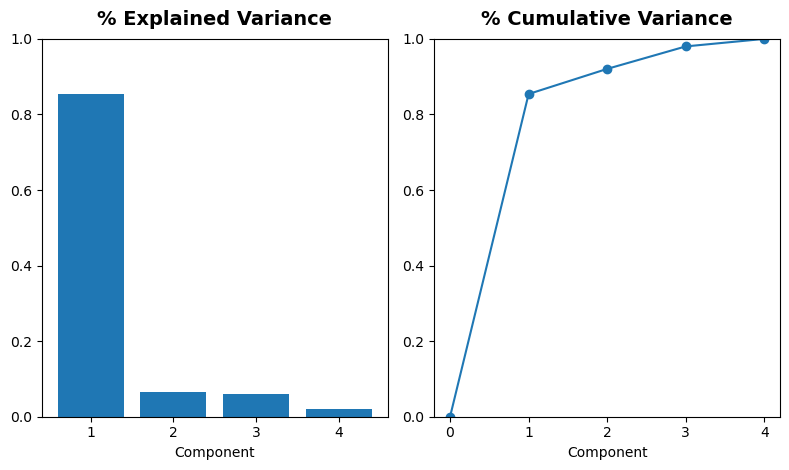

In [11]:
plot_variance(pca);

In [20]:
mi_scores = make_mi_scores(X_pca, y, discrete_feautures=False)
mi_scores

NameError: name 'discrete_features' is not defined

In [ ]:
# Show dataframe sorted by PC3
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ["make", "body_style", "horsepower", "curb_weight"]
df.loc[idx, cols]

In [ ]:
df["sports_or_wagon"] = X.curb_weight / X.horsepower
sns.regplot(x="sports_or_wagon", y='price', data=df, order=2);

In [ ]:
sns.catplot(y="value", col="variable", data=X_pca.melt(),kind='boxen',sharey=False,col_wrap=2)